<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

Jawab:
1. Data latih adalah data yang digunakan oleh model untuk belajar. data validasi adalah data yang digunakan untuk mengukur sebaik apa model dalam mempelajari data latih. data test adalah data yang akan diprediksi oleh model.
2. suatu performa dari model dinilai dengan melihat tingkat keakuratan model dalam memprediksi data baru berdasarkan data latih yang dipelajarinya. nilai performa model semakin baik jika errornya semakin kecil, baik itu error bias maupun error variance.
3. confusion matrix adalah salah satu cara mengukur performa model. dalam confusion matrix ditampilkan nilai aktual data dan nilai hasil prediksi model. pada confusion matrix terdapat nilai TP(True positive) yang berarti nilainy aktualnya benar dan hasil prediksi benar, FP(False Positive) yang berarti nilai aktualnya salah tetapi diprediksi nilainya benar, TN(True Negative) yang berarti nilai aktual dan prediksinya keduanya salah, dan FN(False Negative) yang berarti nilai aktualnya benar sedangkan nilai prediksinya salah.   
4. Classification Report  merupakan hasil dari confusion matrix yang digunakan untuk menilai performa dari model dilihat dari nilai precision, recall, dan f1-score. precision merupakan perbandingan antara nilai prediksi yang benar dan nilai semua prediksi benar. recall merupakan perbandingan antara nilai prediksi yang benar dan nilai aktuan benar. sedangkan f1-score adalah 2*precision*recall/(precison+recall)

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

In [59]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [60]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


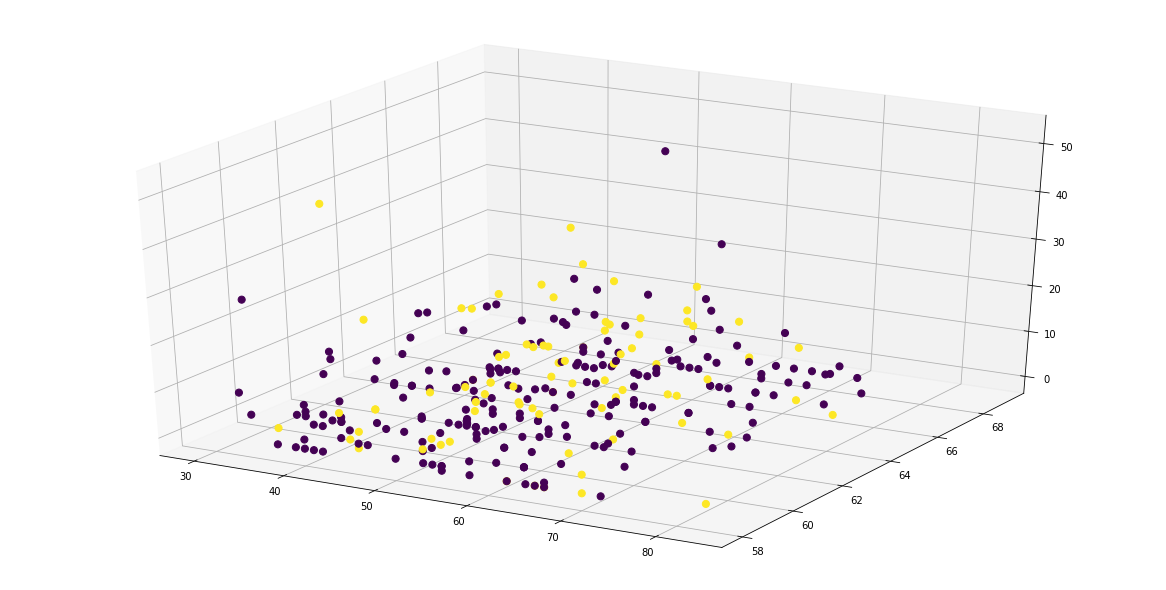

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,8))
ax = Axes3D(fig)

ax.scatter(df['Age'], df["Patient's Years"], df['N_positive_ax'], c=df['survival_status'], s=50, alpha=1)

plt.show()

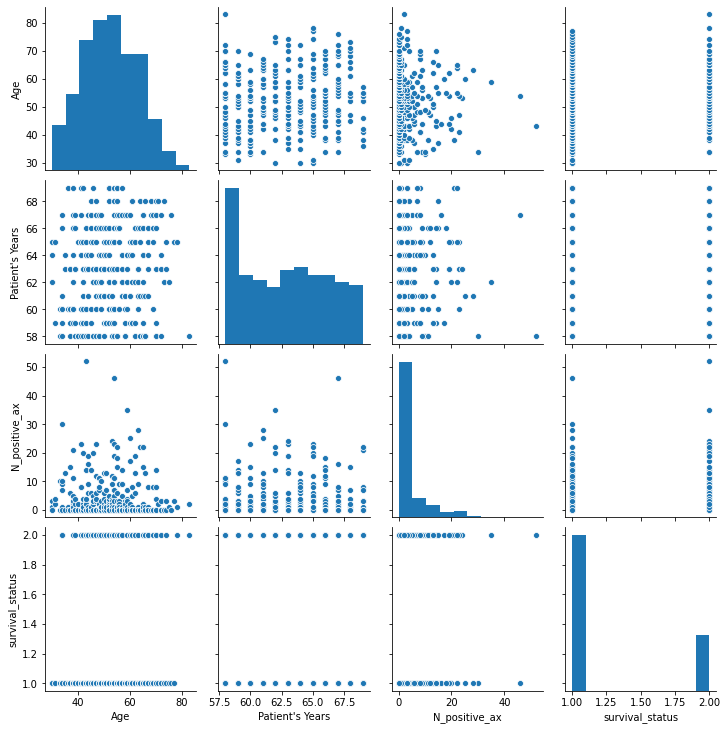

In [62]:
import seaborn as sns

sns.pairplot(df)

In [63]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [64]:
x = df.drop('survival_status', axis=1)
y = df['survival_status']

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=21, stratify=y)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(x_train, y_train)

scoring = cross_val_score(model_knn, x, y, scoring='roc_auc', cv=10)
scoring

array([0.66032609, 0.58152174, 0.32608696, 0.73369565, 0.66847826,
       0.74747475, 0.80681818, 0.64772727, 0.80113636, 0.67897727])

In [66]:
# 3. score rata2
scoring.mean()

0.6652242534036013

In [67]:
roc_auc_score(y_test, model_knn.predict(x_test))

0.5622807017543859

In [68]:
# 4. prediksi data test
y_predict = model_knn.predict(x_test)
y_predict

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2])

In [69]:
# 5. confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predict)

array([[47, 10],
       [14,  6]])

In [70]:
# 6. classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.77      0.82      0.80        57
           2       0.38      0.30      0.33        20

    accuracy                           0.69        77
   macro avg       0.57      0.56      0.56        77
weighted avg       0.67      0.69      0.68        77



7. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? (0.77)

8. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? (0.38)

---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

Jawab:
1. bias adalah error yang disebabkan model terlalu simpel, sehingga model kurang bagus dalam mempresentasikan data training maupun data test. variance adalah error yang disebabkan karena model terlalu komplo=eks, sehingga model sangat memfiting data training, akibatnya model tidak mengeneralisai data test dengan baik.
2. overfitting adalah keadaan dimana model terlalu memfitting data training, sehingga kurang mengeneralisasi data test. underfitting adalah keadaan dimana model kurang memfitting data training yg diakibatkan terlalu simpelnya model sehingga model kurang bagus dalam memprediksi data test.
3. kita bisa mengatur kompleksitas dari model dengan memperkecil bias dan variance. kita bisa meningkatkan kompleksitas untuk memperkecil bias dan menurunkan kompleksitas untuk mengurasi variance.
4. model yang baik adalah model yang memiliki error yang kecil. erroe yang kecil berarti error bias dan variancenya kecil.
5. GridSearchcv akan memeriksa semua hyperparameter yang mungkin, sedangkan RandomizedSearchCV akan memilih secara random beberapa hyperparameter. jadi ketika kita hanya ingin mencoba beberapa random hyperparameter saja, kita bisa menggunakan RandomizedSearchCV. 

---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik, overtting, atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [71]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [72]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [73]:
# Code here
x = df.drop('survival_status', axis=1)
y = df['survival_status']

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=21, stratify=y)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

model_knn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50), 'weights':['uniform','distance']}
gscv = GridSearchCV(model_knn, param_grid=param_grid, scoring='roc_auc', cv=5)
gscv.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [75]:
model_ = KNeighborsClassifier(n_neighbors=40, weights='uniform')
model_.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [76]:
# 7
gscv.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

In [77]:
# 8
model_ = KNeighborsClassifier(n_neighbors=38, weights='uniform')
model_.fit(x_train, y_train)
scoring = cross_val_score(model_, x,y, scoring='roc_auc', cv=10)
scoring.mean()

0.6844532279314887

In [78]:
y_predict = model_.predict_proba(x_test)

In [79]:
model_.classes_

array([1, 2])

In [80]:
y_predict[:,1]

array([0.21052632, 0.28947368, 0.31578947, 0.52631579, 0.31578947,
       0.15789474, 0.18421053, 0.18421053, 0.18421053, 0.31578947,
       0.55263158, 0.15789474, 0.18421053, 0.23684211, 0.15789474,
       0.18421053, 0.23684211, 0.18421053, 0.18421053, 0.52631579,
       0.13157895, 0.15789474, 0.18421053, 0.57894737, 0.21052632,
       0.13157895, 0.21052632, 0.15789474, 0.18421053, 0.18421053,
       0.10526316, 0.57894737, 0.18421053, 0.21052632, 0.47368421,
       0.15789474, 0.26315789, 0.21052632, 0.21052632, 0.21052632,
       0.52631579, 0.18421053, 0.13157895, 0.44736842, 0.15789474,
       0.10526316, 0.18421053, 0.15789474, 0.15789474, 0.57894737,
       0.15789474, 0.57894737, 0.13157895, 0.18421053, 0.18421053,
       0.23684211, 0.18421053, 0.34210526, 0.18421053, 0.57894737,
       0.44736842, 0.15789474, 0.23684211, 0.15789474, 0.28947368,
       0.15789474, 0.18421053, 0.23684211, 0.31578947, 0.10526316,
       0.26315789, 0.15789474, 0.15789474, 0.55263158, 0.18421

In [81]:
#11
roc_auc_score(y_test, model_.predict(x_test))

0.606140350877193

In [82]:
#12
print (roc_auc_score(y_train, model_.predict(x_train)))
print (roc_auc_score(y_test, model_.predict(x_test)))

0.5782591725214675
0.606140350877193


berdasarkan jawaban diatas, karena scorenya rendah, kemungkinan model underfitting.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

model_2 = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}
gscv = GridSearchCV(model_2, param_grid=param_grid, scoring='roc_auc', cv=5)
gscv.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [84]:
gscv.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [85]:
model2 = DecisionTreeClassifier(criterion='entropy', splitter='random')
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [86]:
scoring = cross_val_score(model2, x,y, scoring='roc_auc', cv=10)
scoring.mean()

0.5754034914361001

In [87]:
y_predict = model2.predict_proba(x_test)

In [88]:
print (f'score model KNeighborsClassifier {roc_auc_score(y_test, model_.predict(x_test))} ')
print (f'score model DecisionTreeClassifierr {roc_auc_score(y_test, model2.predict(x_test))}')

score model KNeighborsClassifier 0.606140350877193 
score model DecisionTreeClassifierr 0.5771929824561404


Berdasarkan perbandingan score roc_auc, model DecisionTreeClassifier memiliki performa lebih baik dibandingkan model KNeighborsClassifier